In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r"D:\DATA ANALYTICS\Python\dataset\boxplot_data.xlsx")
df = pd.DataFrame(data)
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


# check distribution

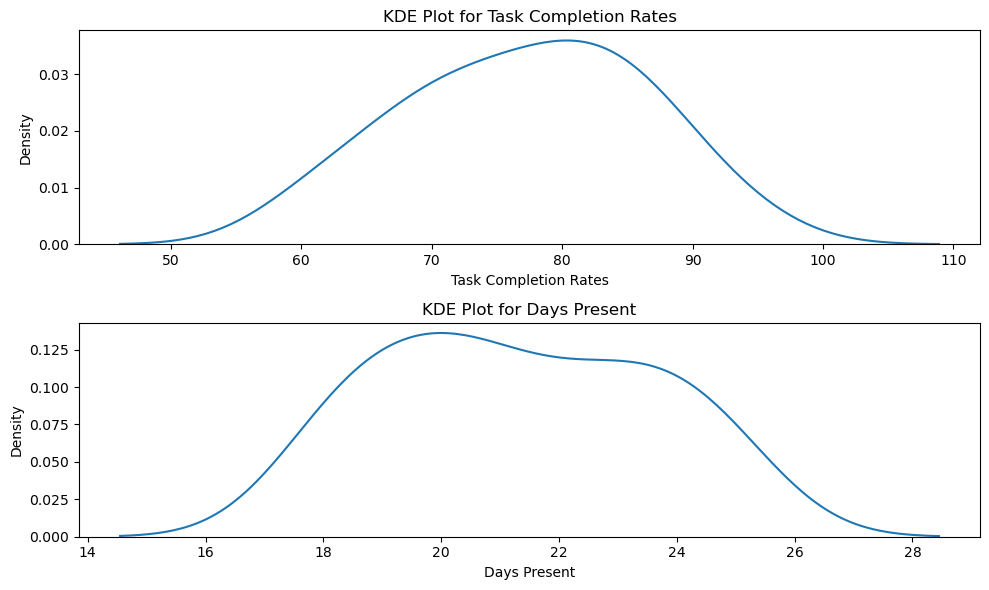

In [4]:
# Numeric columns to plot
numeric_columns = ['Task Completion Rates', 'Days Present']


# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 6))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Plot KDEs
for index, column in enumerate(numeric_columns):
    sns.kdeplot(df[column], ax=axes[index])
    axes[index].set_title(f'KDE Plot for {column}')

plt.tight_layout()
plt.show()

# Normality test


In [6]:
from scipy.stats import shapiro

In [7]:
numeric_columns = ['Task Completion Rates', 'Days Present']
shapiro_results = {}
for column in numeric_columns:
    stat, p_value = shapiro(df[column])
    shapiro_results[column] = round(p_value, 3)
    
print(shapiro_results)


{'Task Completion Rates': 0.321, 'Days Present': 0.044}


(<Axes: xlabel='Task Completion Rates_sqrt', ylabel='Density'>,
 0.26458350826238264)

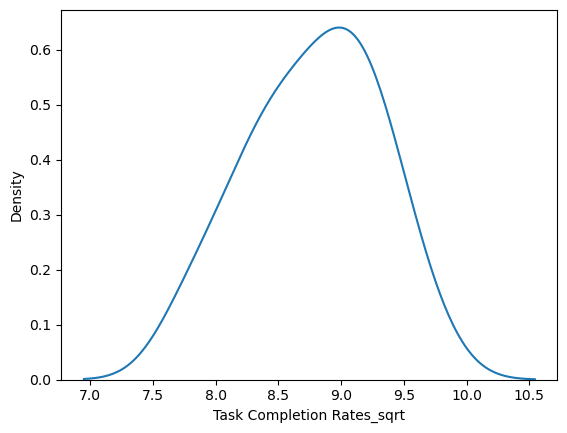

In [29]:
def sqrt_transformation(data, column_name):
    data[f"{column_name}_sqrt"] = np.sqrt(data[column_name])
    stat, p_value = shapiro(data[f"{column_name}_sqrt"])
    distribution = sns.kdeplot(data[f"{column_name}_sqrt"])
    return distribution, p_value

B = pd.read_excel(r"D:\DATA ANALYTICS\Python\dataset\boxplot_data.xlsx")
sqrt_transformation(B, "Task Completion Rates")

(<Axes: xlabel='Task Completion Rates_log', ylabel='Density'>,
 0.1944325388041736)

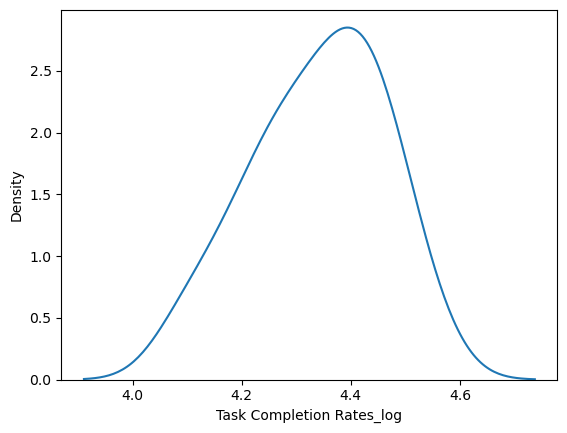

In [37]:
def log_transformation(data, column_name):
    data[f'{column_name}_log'] = np.log(data[column_name])
    stat, p_value = shapiro(data[f'{column_name}_log'])
    distribution = sns.kdeplot(data[f'{column_name}_log'])
    return (distribution, p_value)

B = pd.read_excel(r"D:\DATA ANALYTICS\Python\dataset\boxplot_data.xlsx")

log_transformation (B, "Task Completion Rates")